In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

# Read data

In [20]:
actions = pd.read_csv("../data/user16_vs_the_world.csv")
actions.head()

,traveled_distance_pixel,elapsed_time,straightness,num_points,sum_of_angles,mean_curv,sd_curv,max_curv,min_curv,mean_omega,...,action_3,action_4,direction_1,direction_2,direction_3,direction_4,direction_5,direction_6,direction_7,user_16
0,7.000000,0.125,1.000000,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
1,89.008474,0.437,0.999968,5,0.016948,-0.000634,0.001366,0.000287,-0.002825,0.009086,...,0,0,0,0,0,0,0,0,0,1
2,3.000000,0.125,1.000000,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,1
3,1051.510748,3.369,0.310032,29,12.039747,0.060570,0.315803,1.570796,-0.397340,0.563722,...,1,0,0,0,0,0,0,0,0,1
4,42.000000,0.390,1.000000,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [21]:
actions.columns

Index(['traveled_distance_pixel', 'elapsed_time', 'straightness', 'num_points',
       'sum_of_angles', 'mean_curv', 'sd_curv', 'max_curv', 'min_curv',
       'mean_omega', 'sd_omega', 'max_omega', 'min_omega', 'largest_deviation',
       'dist_end_to_end_line', 'num_critical_points', 'mean_vx', 'sd_vx',
       'max_vx', 'min_vx', 'mean_vy', 'sd_vy', 'max_vy', 'min_vy', 'mean_v',
       'sd_v', 'max_v', 'min_v', 'mean_a', 'sd_a', 'max_a', 'min_a',
       'mean_jerk', 'sd_jerk', 'max_jerk', 'min_jerk', 'a_beg_time',
       'action_3', 'action_4', 'direction_1', 'direction_2', 'direction_3',
       'direction_4', 'direction_5', 'direction_6', 'direction_7', 'user_16'],
      dtype='object')

In [22]:
# split into features and target variable
X = actions.drop("user_16", axis=1)
y = actions["user_16"]

norm_X = normalize(X)

X_train, X_test, y_train, y_test = train_test_split(norm_X, y, test_size=0.3,
                                                    random_state=42)

# Best Guess Approach

In [23]:
# knn algo testing 1 to 50 neighbors to see which number of neighbors is best

scores = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

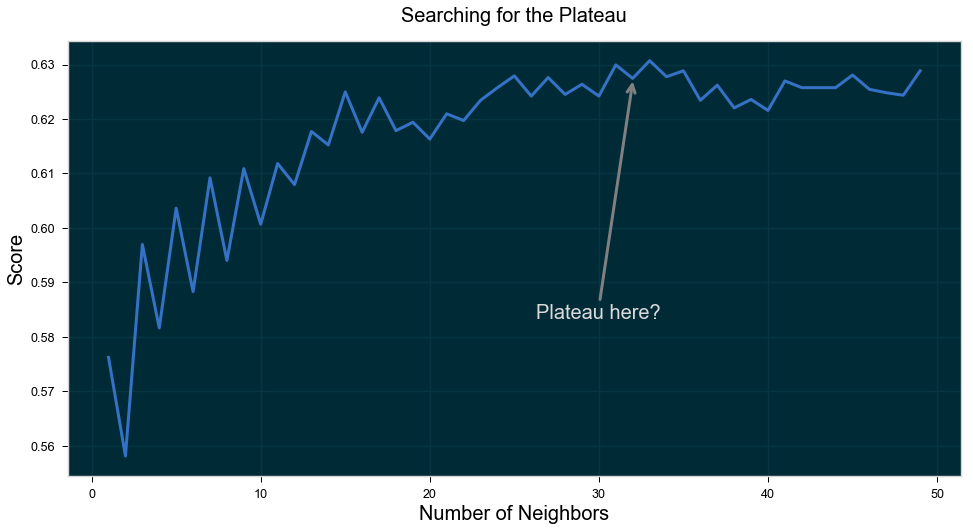

In [60]:
# plot scores for different numbers of neighbors

fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=list(range(1, 50)), y=scores, ax=ax, lw=3)
ax.set_title("Searching for the Plateau", color="black", size=20, y=1.03)
ax.set_xlabel("Number of Neighbors", color="black", size=20)
ax.set_ylabel("Score", color="black", size=20)
ax.tick_params(colors="black")

ax.annotate("Plateau here?",
            xy=(0.65, 0.85),
            xytext=(0.55, 0.4),
            xycoords="figure fraction",
            textcoords="figure fraction",
            size=20,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3',
                            color='grey',
                            lw=3))

plt.show()

In [25]:
knn_best_guess = KNeighborsClassifier(n_neighbors=33)

In [26]:
knn_best_guess.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=33, p=2,
           weights='uniform')

In [27]:
pred = knn_best_guess.predict(X_test)

In [59]:
knn_best_guess.score(X_train, y_train)

0.6534200225568898

In [28]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57      3214
           1       0.61      0.76      0.67      3247

   micro avg       0.63      0.63      0.63      6461
   macro avg       0.64      0.63      0.62      6461
weighted avg       0.64      0.63      0.62      6461

[[1604 1610]
 [ 776 2471]]


============================
### Results

True positives: 1604
True Negatives: 2471
False positives: 776
False negatives: 1610

Accuracy: 65%
Values of FP and FN are imbalanced, accuracy potentially not a good measure. Of all the actions labelled, how many were correct.

Precision: 64%
FPR: 36%
Of all actions labelled as not user 16, how many were not user 16.

Recall: 63%
Of all sessions that were user 16, how many were labelled.

F1-score: 0.62
Weighted average of precision and recall.